In [97]:
import pandas as pd
import seaborn as sns
import numpy as np

In [95]:
train_file = pd.read_csv('Train.csv')

In [98]:
#Finding NaN values in the dataset
train_nan = train_file[train_file.isna().any(axis=1)] 

In [99]:
#looking to fill NaN values in travel_with with 'Alone'
train_nan[['travel_with','total_female','total_male']] 

,travel_with,total_female,total_male
24,NaN,0.0,1.0
81,NaN,0.0,1.0
94,NaN,0.0,1.0
115,NaN,0.0,1.0
121,NaN,1.0,0.0
...,...,...,...
18455,NaN,1.0,0.0
18476,NaN,0.0,1.0
18485,NaN,0.0,1.0
18486,NaN,1.0,0.0


In [100]:
#Filling all null travel with cells with 'Alone'
train_file['travel_with'].fillna('Alone', inplace=True) 

In [101]:
#Dropping incompatable empty value
train_file.drop(train_file.index[316], inplace=True) 

In [132]:
#Dropping all null female values
train_file= train_file.dropna() 

In [122]:
#Replacing all yes/no with 1/0 respectively
train_file.replace(['Yes', 'No'], [1, 0], inplace=True) 

In [105]:
#making total packages per tour column
train_file['total_packages'] = train_file['package_transport_int'] + train_file['package_accomodation'] + \
train_file['package_food'] + train_file['package_transport_tz'] + train_file['package_sightseeing'] + \
+ train_file['package_guided_tour'] + train_file['package_insurance']

In [106]:
#making total people per tour column
train_file['total_people'] = train_file['total_female'] + train_file['total_male']

In [107]:
#makign total days column
train_file['total_days'] = train_file['night_mainland'] + train_file['night_zanzibar']

In [108]:
#Finding outliers in total people
total_people = train_file['total_people'].unique()
sorted_total_people = np.sort(total_people)

In [109]:
#Number of occurences for amount of people on the trip
people_counts = train_file['total_people'].value_counts()

In [110]:
#remove parties > 50
num_people = train_file[train_file['total_people'] > 50].index
train_file.drop(num_people , inplace=True)

In [111]:
#remove outliers for mainland? DISPLOT 
#sns.displot(train_file['night_mainland'])

In [112]:
#Finding outliers in mainland nights(discuss)
mainland_nights = train_file['night_mainland'].unique() 
sorted_mainland_nights = np.sort(mainland_nights)

In [113]:
#remove outliers for zanzibar? DISPLOT
#sns.displot(train_file['night_zanzibar'])

In [114]:
#Finding outliers in zanzibar nights(discuss)
zanibar_nights = train_file['night_zanzibar'].unique()
sorted_zanzibar_nights = np.sort(zanibar_nights)

In [115]:
#All countries into a list
#all_countries = train_file.country.unique().tolist()

In [116]:
#Getting countries where their occurence is less than 10
low_country_count = train_file['country'].value_counts().to_frame()
low_country_count = low_country_count[low_country_count['country'] < 10].index.tolist()

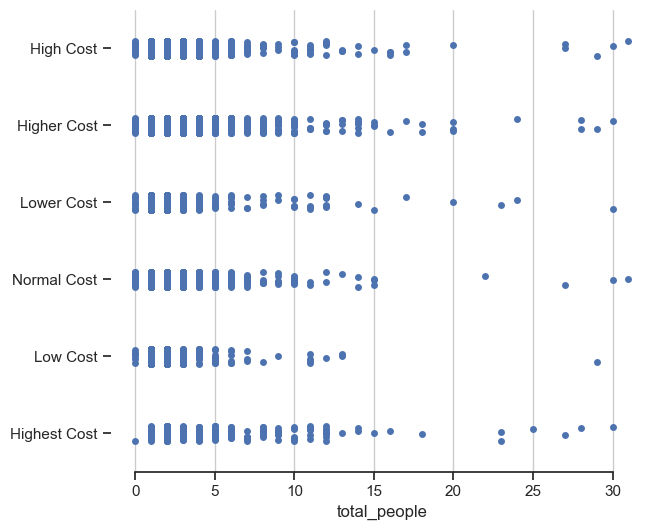

In [117]:
import matplotlib.pyplot as plt

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(7, 6))

# Add in points to show each observation
sns.stripplot(x=train_file.total_people, y=train_file.cost_category)

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(ylabel="")
sns.despine(trim=True, left=True)

In [22]:
#filtering out low countries from countries
#high_country_count = [b for b in all_countries if all(a not in b for a in low_country_count)]

In [137]:
#making a continent column
europe = ['ITALY', 'UNITED KINGDOM', 'FRANCE', 'SWIZERLAND', 'SPAIN', 'DENMARK', 'BELGIUM', 'NETHERLANDS', 'NORWAY',
         'GERMANY','RUSSIA', 'GREECE','POLAND','AUSTRIA','CZECH REPUBLIC', 'IRELAND','SWEDEN', 'FINLAND','LUXEMBOURG', 'ROMANIA', 
         'PORTUGAL', 'SCOTLAND','SLOVAKIA','UKRAIN', 'HUNGARY','TURKEY']
north_america = ['UNITED STATES OF AMERICA', 'CANADA',]
latin_america = ['BRAZIL', 'ARGENTINA', 'URUGUAY','MEXICO', ]
asia = ['INDIA', 'CHINA', 'JAPAN', 'MALAYSIA', 'KOREA', 'THAILAND', 'SINGAPORE', 'PAKISTAN', 'TAIWAN', 'PHILIPINES',]
middle_east = ['LEBANON', 'ISRAEL', 'UNITED ARAB EMIRATES', 'QATAR', 'OMAN', 'UAE', 'SAUD ARABIA',]
oceania = ['AUSTRALIA', 'NEW ZEALAND',]
africa = ['RWANDA','NIGERIA', 'ZAMBIA', 'ZIMBABWE', 'SOUTH AFRICA', 'KENYA', 'DRC', 'UGANDA', 'CONGO', 'BURUNDI', 'NAMIBIA',
         'SUDAN', 'MALAWI','EGYPT', 'SRI LANKA','BOTSWANA', 'COMORO', 'ETHIOPIA','SWAZILAND',
 'MOZAMBIQUE', 'MAURITIUS']
other = ['CHILE', 'SERBIA', 'BAHRAIN', 'COLOMBIA', 'VIETNAM', 'MALT', 'KUWAIT', 'INDONESIA','GHANA', 'TRINIDAD TOBACCO',
         'CROATIA','BULGARIA','MADAGASCAR','CAMEROON','ICELAND','LATVIA','LITHUANIA','ALGERIA','MORROCO','BERMUDA','SLOVENIA',
         'SOMALI','YEMEN','VENEZUELA','ANGOLA','SEYCHELLES','NEPAL','TANZANIA','SENEGAL','JAMAICA','GAMBIA','PERU','IRAN',
         'LESOTHO','COSTARICA','GEORGIA','BOSNIA','DOMINICA','CAMBODIA','BURGARIA','AFGHANISTAN','ECUADO','PAPUA NEW GUINEA','ARMENIA',
         'CYPRUS','MACEDONIA','IVORY COAST','MONECASQUE','BARBADOS','MONTENEGRO','DJIBOUT','TUNISIA','LIBERIA','BANGLADESH','ERITREA',
         'NIGER','ESTONIA','CAPE VERDE','JORDAN']

conditions = [train_file['country'].isin(europe), 
        train_file['country'].isin(north_america), train_file['country'].isin(latin_america),
        train_file['country'].isin(asia), train_file['country'].isin(middle_east), 
        train_file['country'].isin(oceania), train_file['country'].isin(africa), 
         train_file['country'].isin(other)]

values = ['EUROPE', 'NORTH AMERICA', 'LATIN AMERICA', 'ASIA', 'MIDDLE EAST', 'OCEANIA', 'AFRICA', 'OTHER']
train_file['continent'] = np.select(conditions, values)

In [138]:
#Replacing cost categories with representative numerical values
train_file.replace({'Lower Cost' : 1, 
                    'Low Cost' : 2, 
                    'Normal Cost' : 3, 
                    'High Cost' : 4, 
                    'Higher Cost' : 5, 
                    'Highest Cost' : 6}, inplace=True)

In [25]:
#getting the correlations of the entire training table
training_correlations = train_file.corr()

C:\Users\willi\AppData\Local\Temp\ipykernel_8196\1630082594.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  training_correlations = train_file.corr()


In [77]:
#getting the correlations of the cost category
training_corr_series = training_correlations['cost_category']

In [27]:
#getting correlations over 0.5
pos_cost_correlations = training_correlations[training_correlations['cost_category'] > 0.5]['cost_category']

In [28]:
#Counting/normalizing cost categories across continents
cont_vs_cost = pd.crosstab(train_file.continent, train_file.cost_category, normalize='columns')

[Text(0, 0, 'EUROPE'),
 Text(1, 0, 'NORTH AMERICA'),
 Text(2, 0, 'AFRICA'),
 Text(3, 0, 'OCEANIA'),
 Text(4, 0, 'ASIA'),
 Text(5, 0, 'OTHER'),
 Text(6, 0, 'MIDDLE EAST'),
 Text(7, 0, 'LATIN AMERICA')]

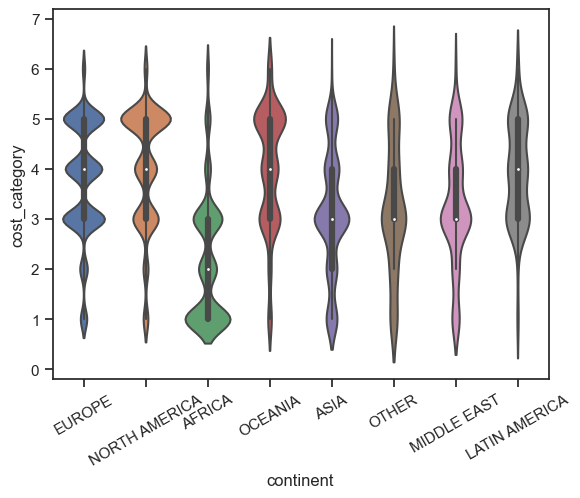

In [139]:
continent_graph = sns.violinplot(x=train_file.continent, y=train_file.cost_category)
continent_graph.set_xticklabels(continent_graph.get_xticklabels(), rotation=30)

In [29]:
#getting mean cost_category across continents
cont_cost_mean = train_file.groupby('continent', as_index=False).cost_category.mean()

In [30]:
#descriptive stats based on continent
descriptive_cont = train_file.groupby('continent').cost_category.describe()

In [32]:
#correlations on attributes over 0.5 grouped by continent
cont_pos_corr = train_file.groupby('continent')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

In [33]:
#Counting/normalizing cost categories across age groups
age_vs_cost = pd.crosstab(train_file.age_group, train_file.cost_category, normalize='columns')

[Text(0, 0, '45-64'),
 Text(1, 0, '25-44'),
 Text(2, 0, '65+'),
 Text(3, 0, '18-24'),
 Text(4, 0, '<18')]

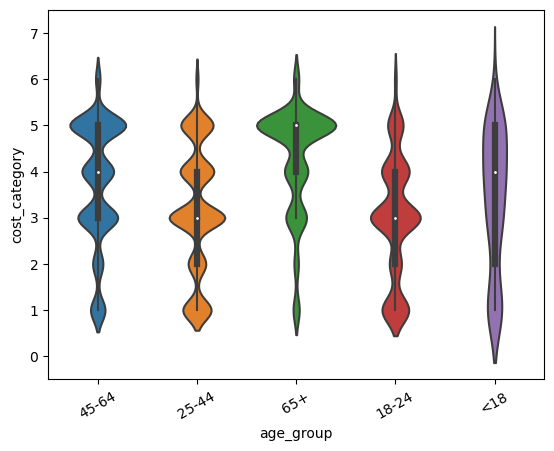

In [71]:
age_graph = sns.violinplot(x=train_file.age_group, y=train_file.cost_category)
age_graph.set_xticklabels(age_graph.get_xticklabels(), rotation=30)

In [34]:
#getting mean cost_category across ages
age_cost_mean = train_file.groupby('age_group', as_index=False).cost_category.mean()

In [35]:
#descriptive stats based on age groups
descriptive_age = train_file.groupby('age_group').cost_category.describe()

In [36]:
#correlations on attributes over 0.5 grouped by age groups
age_pos_corr = train_file.groupby('age_group')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

In [37]:
#Counting/normalizing cost categories across travel group type
travelers_vs_cost = pd.crosstab(train_file.travel_with, train_file.cost_category, normalize='columns')

[Text(0, 0, 'With Children'),
 Text(1, 0, 'With Spouse'),
 Text(2, 0, 'With Spouse and Children'),
 Text(3, 0, 'Alone'),
 Text(4, 0, 'With Other Friends/Relatives')]

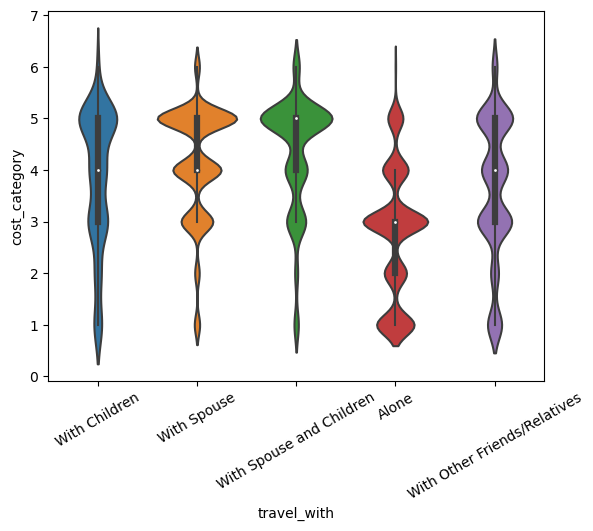

In [70]:
travelers_graph = sns.violinplot(x=train_file.travel_with, y=train_file.cost_category)
travelers_graph.set_xticklabels(travelers_graph.get_xticklabels(), rotation=30)

In [38]:
#getting mean cost_category across travel group type
travelers_cost_mean = train_file.groupby('travel_with', as_index=False).cost_category.mean()

In [39]:
#descriptive stats based on travel group type
descriptive_travelers = train_file.groupby('travel_with').cost_category.describe()

In [40]:
#correlations on attributes over 0.5 grouped by travel group type
travelers_pos_corr = train_file.groupby('travel_with')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

In [54]:
#Counting/normalizing cost categories across travel purpose
purpose_vs_cost = pd.crosstab(train_file.purpose, train_file.cost_category, normalize='columns')

cost_category,1,2,3,4,5,6
purpose,,,,,,
Business,0.311648,0.293930,0.156279,0.031819,0.012952,0.005587
Leisure and Holidays,0.174523,0.258786,0.528240,0.847430,0.934416,0.969274
Medical,0.000000,0.000639,0.000914,0.000000,0.000617,0.000000
Meetings and Conference,0.099727,0.155911,0.099616,0.022573,0.009868,0.008380
Other,0.065056,0.027476,0.012429,0.005711,0.005140,0.005587
Scientific and Academic,0.018699,0.014696,0.016450,0.006255,0.002878,0.000000
Visiting Friends and Relatives,0.312037,0.226198,0.145129,0.060647,0.026521,0.008380
Volunteering,0.018309,0.022364,0.040943,0.025564,0.007607,0.002793


[Text(0, 0, 'Visiting Friends and Relatives'),
 Text(1, 0, 'Leisure and Holidays'),
 Text(2, 0, 'Business'),
 Text(3, 0, 'Scientific and Academic'),
 Text(4, 0, 'Meetings and Conference'),
 Text(5, 0, 'Volunteering'),
 Text(6, 0, 'Other'),
 Text(7, 0, 'Medical')]

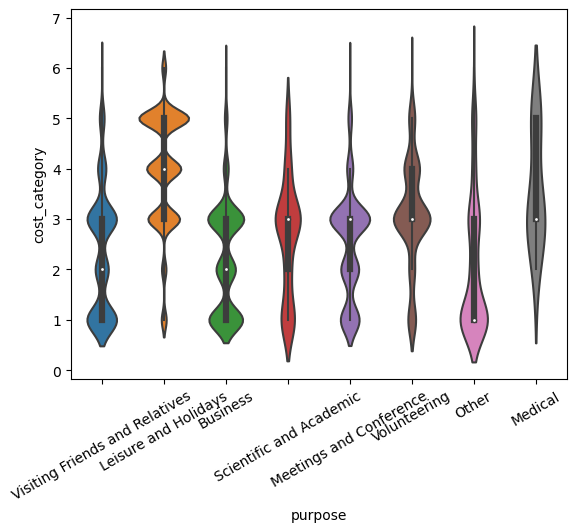

In [69]:
purpose_graph = sns.violinplot(x=train_file.purpose, y=train_file.cost_category)
purpose_graph.set_xticklabels(purpose_graph.get_xticklabels(), rotation=30)

In [53]:
#getting mean cost_category across purpose types
purpose_cost_mean = train_file.groupby('purpose', as_index=False).cost_category.mean()
purpose_cost_mean

,purpose,cost_category
0,Business,2.211580
1,Leisure and Holidays,4.016594
2,Medical,3.555556
3,Meetings and Conference,2.518236
4,Other,2.079755
5,Scientific and Academic,2.656566
6,Visiting Friends and Relatives,2.363715
7,Volunteering,3.095890


In [52]:
#descriptive stats based on purpose type
descriptive_purpose = train_file.groupby('purpose').cost_category.describe()
descriptive_purpose

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
Business,2297.0,2.211580,1.068061,1.0,1.0,2.0,3.0,6.0
Leisure and Holidays,11751.0,4.016594,1.109793,1.0,3.0,4.0,5.0,6.0
Medical,9.0,3.555556,1.130388,2.0,3.0,3.0,5.0,5.0
Meetings and Conference,1179.0,2.518236,1.049035,1.0,2.0,3.0,3.0,6.0
Other,326.0,2.079755,1.328882,1.0,1.0,1.0,3.0,6.0
Scientific and Academic,198.0,2.656566,1.172109,1.0,2.0,3.0,3.0,5.0
Visiting Friends and Relatives,2304.0,2.363715,1.213473,1.0,1.0,2.0,3.0,6.0
Volunteering,438.0,3.095890,1.037040,1.0,3.0,3.0,4.0,6.0


In [51]:
#correlations on attributes over 0.5 grouped by purpose type
purpose_pos_corr = train_file.groupby('purpose')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']
purpose_pos_corr

purpose                                              
Business                        package_transport_int    0.234991
                                package_accomodation     0.278837
                                package_food             0.238776
                                package_transport_tz     0.211611
                                total_packages           0.281739
                                cost_category            1.000000
Leisure and Holidays            package_transport_int    0.389530
                                package_accomodation     0.468925
                                package_food             0.431542
                                package_transport_tz     0.399330
                                total_packages           0.490134
                                cost_category            1.000000
Medical                         package_transport_int   -0.027864
                                package_accomodation     0.582816
                      

In [50]:
#Counting/normalizing cost categories across main activities
mainact_vs_cost = pd.crosstab(train_file.main_activity, train_file.cost_category, normalize='columns')

cost_category,1,2,3,4,5,6
main_activity,,,,,,
Beach Tourism,0.172575,0.240895,0.246573,0.297525,0.171875,0.203911
Bird Tourism,0.012466,0.010863,0.008774,0.006799,0.004523,0.000000
Business,0.012855,0.008946,0.015902,0.020669,0.013363,0.013966
Conference Tourism,0.042072,0.067732,0.116798,0.156106,0.093339,0.106145
Cultural Tourism,0.160109,0.107348,0.091574,0.055752,0.029811,0.036313
Diving and Sport Fishing,0.003116,0.000639,0.001462,0.001904,0.001234,0.011173
Hunting Tourism,0.268407,0.174441,0.104734,0.030188,0.013158,0.005587
Mountain Climbing,0.059992,0.067732,0.038201,0.011422,0.003289,0.005587
Widlife Tourism,0.150760,0.192971,0.267044,0.313843,0.519120,0.444134


[Text(0, 0, 'Beach Tourism'),
 Text(1, 0, 'Wildlife Tourism'),
 Text(2, 0, 'Widlife Tourism'),
 Text(3, 0, 'Cultural Tourism'),
 Text(4, 0, 'Bird Tourism'),
 Text(5, 0, 'Hunting Tourism'),
 Text(6, 0, 'Conference Tourism'),
 Text(7, 0, 'Mountain Climbing'),
 Text(8, 0, 'Business'),
 Text(9, 0, 'Diving and Sport Fishing')]

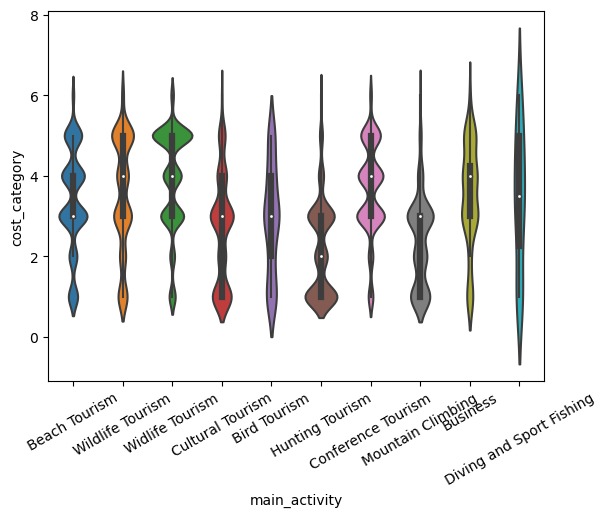

In [74]:
activity_graph = sns.violinplot(x=train_file.main_activity, y=train_file.cost_category)
activity_graph.set_xticklabels(activity_graph.get_xticklabels(), rotation=30)

In [46]:
#getting mean cost_category across mainact types
mainact_cost_mean = train_file.groupby('main_activity', as_index=False).cost_category.mean()

In [47]:
#descriptive stats based on main act type
descriptive_mainact = train_file.groupby('main_activity').cost_category.describe()

In [48]:
#correlations on attributes over 0.5 grouped by main act type
mainact_pos_corr = train_file.groupby('main_activity')[['package_transport_int', 'package_accomodation', 'package_food', 'package_transport_tz',
                                'total_packages', 'cost_category']].corr()['cost_category']

In [133]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
train_file.isnull().sum()


Tour_ID                  0
country                  0
age_group                0
travel_with              0
total_female             0
total_male               0
purpose                  0
main_activity            0
info_source              0
tour_arrangement         0
package_transport_int    0
package_accomodation     0
package_food             0
package_transport_tz     0
package_sightseeing      0
package_guided_tour      0
package_insurance        0
night_mainland           0
night_zanzibar           0
first_trip_tz            0
cost_category            0
total_packages           0
total_people             0
total_days               0
dtype: int64

In [135]:
X = train_file[['total_people','package_transport_int', 'package_accomodation','package_food', 'package_transport_tz',
'package_insurance','package_guided_tour','package_sightseeing']]

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]
  
print(vif_data)

                 feature        VIF
0           total_people   1.564326
1  package_transport_int   3.088554
2   package_accomodation  13.973256
3           package_food  10.296668
4   package_transport_tz   6.446707
5      package_insurance   1.564070
6    package_guided_tour   4.171750
7    package_sightseeing   3.734385
